<h1>Machine Learning Engineer Nanodegree</h1><h3>Capstone Project</h3><p>Udaykiran Dakavarapu<br>24th June 2018</p><h3>Project: Using Supervised Learning to identify whether an employe will stay in a company or not.</h3>

<p>Employee retention is of significant importance to companies. It should come as no surprise that companies that lead in employee engagement are often some of the most successful and profitable companies. Poor employee engagement means turnover, low morale, poor customer service, and a general blow to your bottom line. However, this issue become ultra-costly when high-performing employees start leaving because of low engagement. Supervised learning deals with Regression and Classification .Classification is being implemented in different fields Ex: Medical diagnosis and this model has gained a momentum to understand the change in behaviour of the consumer so this helps business works on the data. Every company invest a lot on employee to train them and makes employee to work in any kind of situation and in any kind of project. And there are many reasons employees to quit job. Some of them are rude behaviour, work imbalance, Feeling undervalued, Employment misalignment etc. If a company Invest in skill enhancement of an employee he should use it for the growth of the business ,not for his personal profit. And I was searching for the dataset which has features that can be the reasons for the employee to quit job. </p>

In [30]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("HR_comma_sep.csv")

# Success - Display the first record
display(data.head(n=5))

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [31]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<h3>Data Exploration</h3>

In [196]:
totalrecords = len(data)

# Number of records who left the company
totalleft = len(data[data.left == 1])

# Number of records who are still working
totalworking = len(data[data.left == 0])

# Percentage who left the company
percentageleftcompany = float(totalleft* 100)/totalrecords

# Check null values in dataset
null_count = data.isnull().values.ravel().sum()

# Print the results
print ("number of records: {}" .format(totalrecords))

print ("number of employee left: {}" .format(totalleft))
print ("number of employee currently working: {}" .format(totalworking))
print ("Percent of employee left: {:.2f}%" .format(percentageleftcompany))
print ("number of null rows: {}" .format(null_count))

number of records: 14999
number of employee left: 3571
number of employee currently working: 11428
Percent of employee left: 23.81%
number of null rows: 0


<h3>Features Description</h3>
<p>By the above results we can say that there are no null values in the dataset</p><br>
<p>satisfaction_level : Level of Satisfaction.<br>
last_evaluation :Time since Last performance Evaluation. <br>
number_project :Number of Project completed while at work. <br>
average_montly_hours : Average monthly hours at workplace. <br>
time_spend_company : Number of years spent in the company. <br>
Work_accident : Whether the employee had a workplace accident.<br> 
left : Whether employee left the workplace or not.<br>
promotion_last_5years: Wehter employee was promoted in last 5 years.<br>
Department : Department they work for.<br>
Salary : Relative level of Salary(high).</p>

<h3>Data visualation</h3>
<p>In this section we will plot a heatmap to know the correlation between the features</p>

Text(0.5,1,'Heatmap of Correlation Matrix')

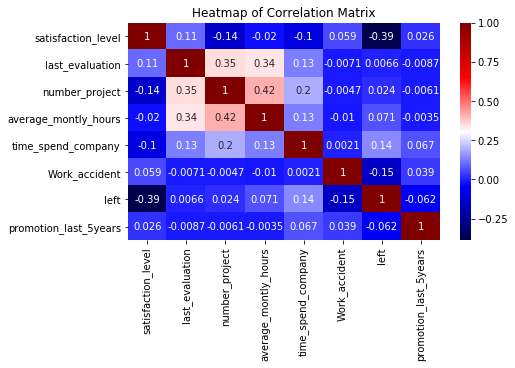

In [197]:
import matplotlib.pyplot as plt

left_raw = data['left']
features_raw = data.drop('left', axis = 1)

# Visualize skewed continuous features of original data
import seaborn as sns

fig = plt.figure(figsize=(7,4))
corr = data.corr()
sns.heatmap(corr,annot=True,cmap='seismic',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')

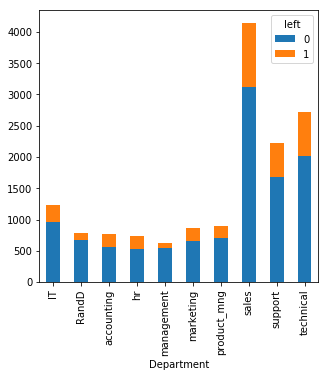

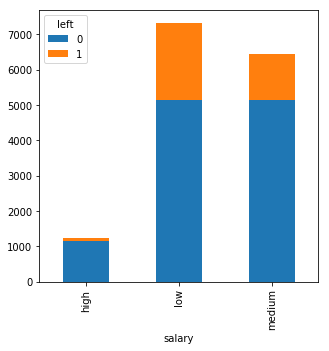

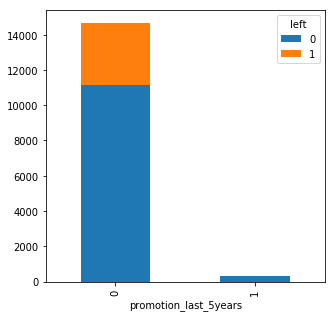

In [198]:
bar_graph = pd.crosstab(index=data["Department"], 
                          columns=data["left"])

bar_graph.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

bar_graph1 = pd.crosstab(index=data["salary"], 
                          columns=data["left"])

bar_graph1.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)
bar_graph2 = pd.crosstab(index=data["promotion_last_5years"], 
                          columns=data["left"])

bar_graph2.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)


Text(0.5,1,'Promotion in last 5 years')

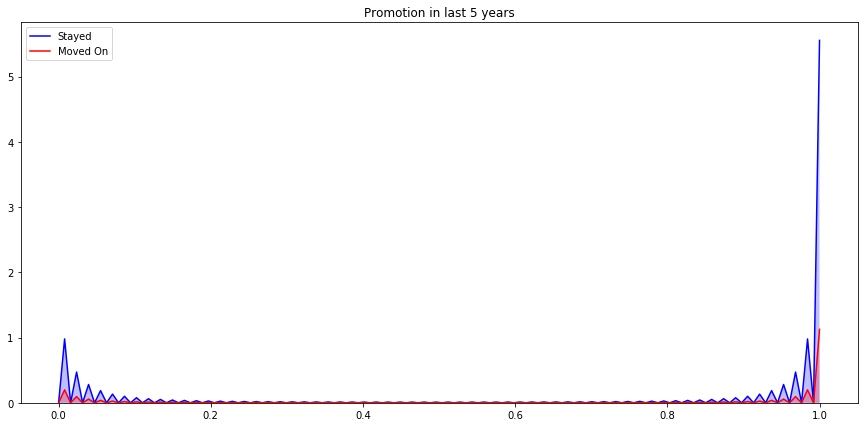

In [199]:
fig1 = plt.figure(figsize=(15,7),)
ax=sns.kdeplot(data.loc[(data['left'] == 0),'promotion_last_5years'] , color='b',shade=True,label='Stayed')
ax=sns.kdeplot(data.loc[(data['left'] == 1),'promotion_last_5years'] , color='r',shade=True, label='Moved On')
plt.title('Promotion in last 5 years')

In [200]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
features_log_transformed = pd.DataFrame(data = features_raw)
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company','Work_accident','promotion_last_5years']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,sales,low
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,sales,medium
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,sales,medium
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,sales,low
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,sales,low


Text(0.5,1,'Heatmap of Correlation Matrix')

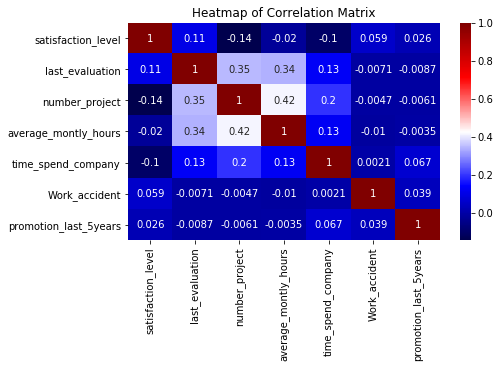

In [201]:
fig = plt.figure(figsize=(7,4))
corr = features_log_transformed.corr()
sns.heatmap(corr,annot=True,cmap='seismic',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')

<p>Now we will do hot encoding</p>

In [202]:
finaldata = pd.get_dummies(features_raw)
print(finaldata)
# Encode the 'left_raw' data to numerical values
left = pd.get_dummies(left_raw, drop_first = True)

# Print the number of features after one-hot encoding
encoded = list(finaldata.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))
print(encoded)

       satisfaction_level  last_evaluation  number_project  \
0                0.318681         0.265625             0.0   
1                0.780220         0.781250             0.6   
2                0.021978         0.812500             1.0   
3                0.692308         0.796875             0.6   
4                0.307692         0.250000             0.0   
5                0.351648         0.218750             0.0   
6                0.010989         0.640625             0.8   
7                0.912088         0.765625             0.6   
8                0.879121         1.000000             0.6   
9                0.362637         0.265625             0.0   
10               0.395604         0.281250             0.0   
11               0.021978         0.703125             0.8   
12               0.824176         0.875000             0.4   
13               0.351648         0.296875             0.0   
14               0.296703         0.312500             0.0   
15      

<h3>Splitting the data</h3>
<p>80% will be used for training and 20% will be used for test. And classification model is evaluated on the basis of accuracy , precison, and recall. </p>

In [216]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(finaldata, 
                                                    left, 
                                                    test_size = 0.2, shuffle = True,
                                                    random_state = 0)

# Show the results of the split
test_data = X_test
print(y_test.shape[0])
print(X_test.shape[0])
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

3000
3000
Training set has 11999 samples.
Testing set has 3000 samples.


In [217]:
print(test_data)

       satisfaction_level  last_evaluation  number_project  \
1670             0.384615         0.328125             0.0   
13378            0.505495         0.937500             0.2   
10233            0.692308         0.484375             0.6   
4719             0.956044         0.609375             0.4   
7003             0.956044         0.281250             0.2   
2831             0.439560         0.937500             0.2   
13013            0.076923         0.625000             0.4   
11978            0.571429         0.500000             0.2   
8610             0.527473         0.656250             0.4   
519              0.329670         0.234375             0.0   
13667            0.109890         0.687500             0.8   
7329             0.703297         1.000000             0.4   
452              0.010989         0.796875             0.8   
12373            0.296703         0.328125             0.0   
4067             0.197802         0.468750             0.2   
10782   

<h3>Evluation Metrics</h3>
<p>Accuracy in classification problems is the number of correct predictions made by the model over all kinds predictions made. 
 <br>
  Accuracy =(TP+TN)/(TP+TN+FP+FN)
 <br>
In the Numerator, are our correct predictions (True positives and True Negatives)(Marked as red in the fig above) and in the denominator, are the kind of all predictions made by the algorithm(Right as well as wrong ones). 

Precision is a measure that tells us what proportion of patients that we diagnosed as having cancer, actually had cancer. The predicted positives (People predicted as cancerous are TP and FP) and the people actually having a cancer are TP.               <br>                      
Precision = TP/(TP+FP)
<br>
Recall is a measure that tells us what proportion of patients that actually had cancer was diagnosed by the algorithm as having cancer. The actual positives (People having cancer are TP and FN) and the people diagnosed by the model having a cancer are TP. (Note: FN is included because the Person actually had a cancer even though the model predicted otherwise).                       <br> 
Recall = TP/(TP+FN) 
<br>
Fβ score – measures the effectiveness of retriveal with respect to a user who attaches beta times as  much importance to recall as precision.                     
<br>    Fβ=(1+β2)⋅precision⋅recall/(β2⋅precision)+recall
<br>
When beta=0.5 more emphasis is placed on precision .This is called  f 0.5 score</p>

In [205]:
def values(y_test, y_predict):
    from sklearn.metrics import fbeta_score, accuracy_score      
    accuracy = accuracy_score(y_test, y_predict)
    fbeta = fbeta_score(y_test, y_predict, beta=0.5)
    print("Model has {:.3f} accuracy"  .format(accuracy))
    print("Model has {:.3f} fbeta Score"  .format(fbeta))
    
    return 

<h3>Benchmark Model</h3>
<p> Logistic regression is used as benchmark model. FBeta score of benchmark model is reference and other model will be judge to perform better if their fbeta score will be greater than Logistic regression model. Accuracy , f-beta score and confusion matrix and will try to get better results in the ensemble learning models</p>

In [206]:

from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score, accuracy_score, confusion_matrix


LRClassifier = LogisticRegression()
LRClassifier.fit(X_train, y_train)
LRPredict = LRClassifier.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, LRPredict).ravel()
print("In LogisticRegression\n")
print("True Negative :{}  " .format(tn))
print("False Positive :{}" .format(fp))
print("False Negative :{}" .format(fn))
print("True Positive :{}" .format(tp))

values( y_test,LRPredict)

In LogisticRegression

True Negative :2134  
False Positive :165
False Negative :474
True Positive :227
Model has 0.787 accuracy
Model has 0.500 fbeta Score


C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [207]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import fbeta_score, accuracy_score, confusion_matrix


ABClassifier = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, random_state=0)
ABClassifier.fit(X_train, y_train)

adaboostPredict = ABClassifier.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, adaboostPredict).ravel()
print("In AdaBoost\n")
print("True Negative :{}  " .format(tn))
print("False Positive :{}" .format(fp))
print("False Negative :{}" .format(fn))
print("True Positive :{}" .format(tp))

values(y_test,adaboostPredict)

C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In AdaBoost

True Negative :2247  
False Positive :52
False Negative :59
True Positive :642
Model has 0.963 accuracy
Model has 0.923 fbeta Score


In [208]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import fbeta_score, accuracy_score, confusion_matrix


GBClassifier = GradientBoostingClassifier(random_state=0)
GBClassifier.fit(X_train, y_train)

GBPredict = GBClassifier.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, GBPredict).ravel()
print("In gradientBoosting\n")
print("True Negative :{}  " .format(tn))
print("False Positive :{}" .format(fp))
print("False Negative :{}" .format(fn))
print("True Positive :{}" .format(tp))

values( y_test,GBPredict)

C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In gradientBoosting

True Negative :2279  
False Positive :20
False Negative :45
True Positive :656
Model has 0.978 accuracy
Model has 0.963 fbeta Score


In [209]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import fbeta_score, accuracy_score, confusion_matrix


SGD_Classifier = SGDClassifier(shuffle = True,loss='log')
SGD_Classifier.fit(X_train, y_train)

SGD_Predict = SGD_Classifier.predict(X_test)
print("In SGDclassifier\n")
tn, fp, fn, tp = confusion_matrix(y_test, SGD_Predict).ravel()
print("True Negative :{}  " .format(tn))
print("False Positive :{}" .format(fp))
print("False Negative :{}" .format(fn))
print("True Positive :{}" .format(tp))
values( y_test, SGD_Predict)

In SGDclassifier

True Negative :2076  
False Positive :223
False Negative :449
True Positive :252
Model has 0.776 accuracy
Model has 0.484 fbeta Score


C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [210]:
from sklearn.svm import SVC
from sklearn.metrics import fbeta_score, accuracy_score, confusion_matrix


SVClassifier = SVC(random_state=0,probability=True)
SVClassifier.fit(X_train, y_train,)

SVPredict = SVClassifier.predict(X_test)
print("In SVC")
tn, fp, fn, tp = confusion_matrix(y_test, SVPredict).ravel()
print("True Negative :{}  " .format(tn))
print("False Positive :{}" .format(fp))
print("False Negative :{}" .format(fn))
print("True Positive :{}" .format(tp))

values(y_test,SVPredict)

C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In SVC
True Negative :2245  
False Positive :54
False Negative :347
True Positive :354
Model has 0.866 accuracy
Model has 0.759 fbeta Score


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

# Initialize the classifier
clf = AdaBoostClassifier(random_state=0)

# Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = { 'n_estimators': [80, 90, 100, 110], 'learning_rate' :[.70, .80, .90, .95] }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta =0.5)
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters, scoring = scorer, cv = kfold)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
print(grid_fit.cv_results_)
#print(kfold)

best_clf = grid_fit.best_estimator_
print ("Best classifier is:", best_clf)
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

print ("Unoptimized model\n")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, adaboostPredict)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, adaboostPredict, beta = 0.5)))
print ("\nOptimized Model\n")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([ 1.13042595,  1.13101749,  1.33449829,  1.39938252,  0.97019658,
        1.07071438,  1.19426806,  1.30532508,  0.96740596,  1.19552071,
        1.34096878,  1.43910935,  1.00328808,  1.10938075,  1.21448925,
        1.39472785]), 'std_fit_time': array([ 0.3281413 ,  0.1115703 ,  0.06875395,  0.10371424,  0.05216449,
        0.0245039 ,  0.04731191,  0.01892964,  0.03426142,  0.15274091,
        0.12614302,  0.09809147,  0.05196808,  0.04731793,  0.06622297,
        0.12349574]), 'mean_score_time': array([ 0.0379092 ,  0.04379454,  0.04804251,  0.04912703,  0.03740811,
        0.03844671,  0.04460623,  0.04366746,  0.03276539,  0.04365454,
        0.04621513,  0.05491602,  0.03514612,  0.04018893,  0.03886724,
        0.04704554]), 'std_score_time': array([ 0.00967609,  0.0149882 ,  0.0123216 ,  0.01304876,  0.00972378,
        0.00431011,  0.01126655,  0.0037537 ,  0.00364525,  0.00936837,
        0.00736892,  0.01175914,  0.00502055,  0.00662611,  0.00261488,

C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Unoptimized model

Accuracy score on testing data: 0.9630
F-score on testing data: 0.9232

Optimized Model

Final accuracy score on the testing data: 0.9657
Final F-score on the testing data: 0.9276


In [212]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
logisticscore = roc_auc_score(y_test, LRClassifier.predict(X_test))
adaboostscore = roc_auc_score(y_test, ABClassifier.predict(X_test))
sgdscore = roc_auc_score(y_test, SGD_Classifier.predict(X_test))
svscore = roc_auc_score(y_test, SVClassifier.predict(X_test))
bestscore = roc_auc_score(y_test, best_clf.predict(X_test))
print("LogisticRegression :{}".format(logisticscore))
print("Adaboost score :{}".format(adaboostscore))
print("SGD score :{}".format(sgdscore))
print("SVC score :{}".format(svscore))
print("Bestscore :{}".format(bestscore))

LogisticRegression :0.6260263874574258
Adaboost score :0.9466079961578532
SGD score :0.6312438764233534
SVC score :0.7407521970415719
Bestscore :0.9513225684553043


<h3>Classifier Comparision</h3>
<p>A comparison of a several classifiers in scikit-learn on synthetic datasets. The point of this example is to illustrate the nature of decision boundaries of different classifiers. This should be taken with a grain of salt, as the intuition conveyed by these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated linearly and the simplicity of classifiers such as naive Bayes and linear SVMs might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points semi-transparent. The lower right shows the classification accuracy on the test set.
</p>

[(array([[ 0.03159499,  0.98698776],
       [ 2.11509784, -0.04624397],
       [ 0.88248972, -0.07575606],
       [-0.0551441 , -0.03733246],
       [ 0.82954503, -0.53932149],
       [ 2.11285708,  0.66208353],
       [ 0.5696927 ,  0.33744136],
       [ 0.95217454, -0.75307471],
       [-0.02922115,  0.39287336],
       [ 1.71579557,  0.36069454],
       [-0.27883014,  0.61420539],
       [ 2.00344509, -0.3091496 ],
       [ 1.50009616, -0.74636376],
       [ 1.22540835,  1.19793017],
       [ 0.46730819,  0.54703192],
       [-0.36653222,  1.11971633],
       [ 0.30124459,  1.23315697],
       [ 0.30430746,  0.82373935],
       [-0.23712492,  0.77876034],
       [ 1.16339832,  0.55290238],
       [-0.59702417,  0.6572361 ],
       [ 0.46356735, -0.1951543 ],
       [ 0.68451111,  0.75287685],
       [ 0.70515699, -0.45892444],
       [-0.65805008, -0.12944211],
       [-0.74662946, -0.3829632 ],
       [ 0.60585226,  0.31252842],
       [ 2.18137168, -0.02291747],
       [ 1.9198063

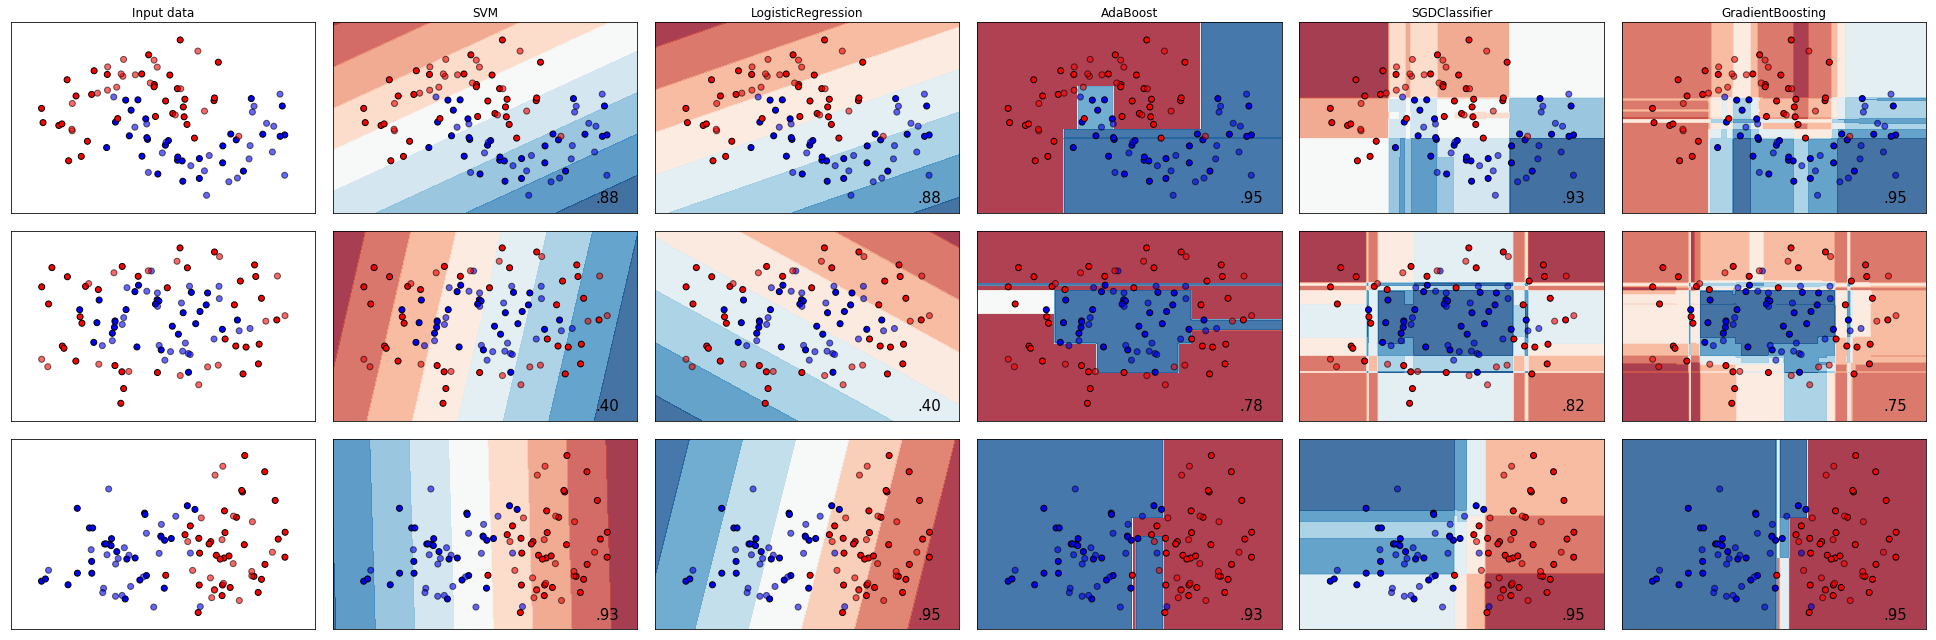

In [213]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["SVM","LogisticRegression","AdaBoost","SGDClassifier",
         "GradientBoosting"]

classifiers = [
    SVC(kernel="linear", C=0.025),
    LogisticRegression(),
    DecisionTreeClassifier(max_depth=5),
    AdaBoostClassifier(),
    GradientBoostingClassifier(random_state=0)
    ]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]
print(datasets)
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

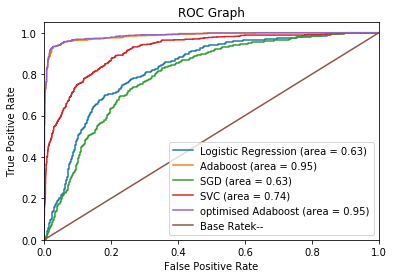

In [218]:
from sklearn.metrics import roc_curve, roc_auc_score

lr1, lr2, thresholds = roc_curve(y_test, LRClassifier.predict_proba(test_data)[:,1])
ab1, ab2, ab_thresholds = roc_curve(y_test, ABClassifier.predict_proba(test_data)[:,1])
sg1, sg2, sg_thresholds = roc_curve(y_test, SGD_Classifier.predict_proba(test_data)[:,1])
sv1, sv2, sv_thresholds = roc_curve(y_test, SVClassifier.predict_proba(test_data)[:,1])
oab1, oab2, thresholdsab = roc_curve(y_test, best_clf.predict_proba(test_data)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(lr1, lr2, label='Logistic Regression (area = %0.2f)' % logisticscore)

# Plot Adaboost ROC
plt.plot(ab1, ab2, label='Adaboost (area = %0.2f)' % adaboostscore)
#plot SGD ROC
plt.plot(sg1, sg2, label='SGD (area = %0.2f)' % sgdscore)
#plot SVS ROC
plt.plot(sv1, sv2, label='SVC (area = %0.2f)' % svscore)

# Plot Improved Adaboost Tree ROC

plt.plot(oab1, oab2, label='optimised Adaboost (area = %0.2f)' % bestscore)

# Plot Base Rate ROC

plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()